Exploratory Data Analysis(EDA) on Retail Sales Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'C:\Users\Dell\Documents\shifna\retail_sales_dataset.csv')

In [5]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [6]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
data.shape

(1000, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Missing Values

In [11]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
data['Age'].mean()

41.392

In [13]:
data['Quantity'].median()

3.0

In [14]:
data['Price per Unit'].std()

189.68135627129138

Summary of the Data

In [16]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [17]:
data['Quantity'].sum()

2514

In [18]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Exploratory Data Analysis

<Axes: >

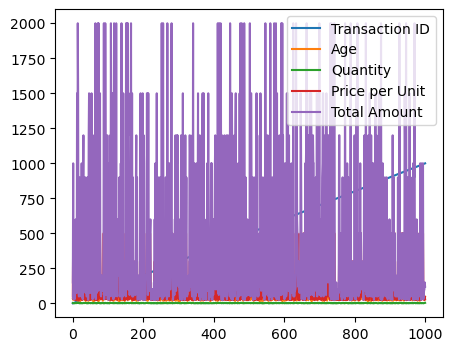

In [20]:
data.plot(figsize=(5,4))

In [21]:
product_cat_fr =data['Product Category'].value_counts()
product_cat_fr

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

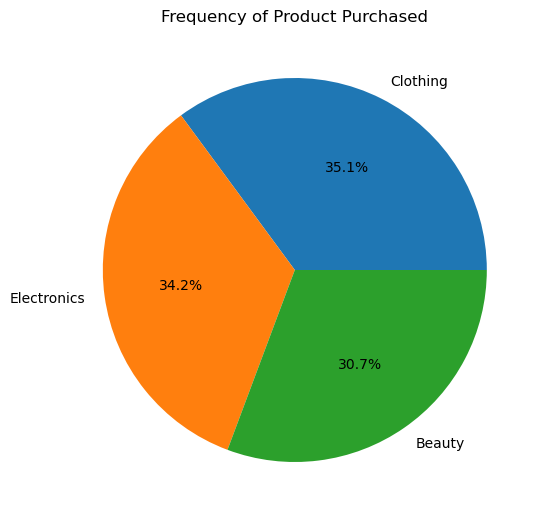

In [22]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
l=['Clothing','Electronics','Beauty']
s=[351,342,307]
plt.title('Frequency of Product Purchased')
plt.pie(s,labels=l,autopct='%0.1f%%')
plt.show()

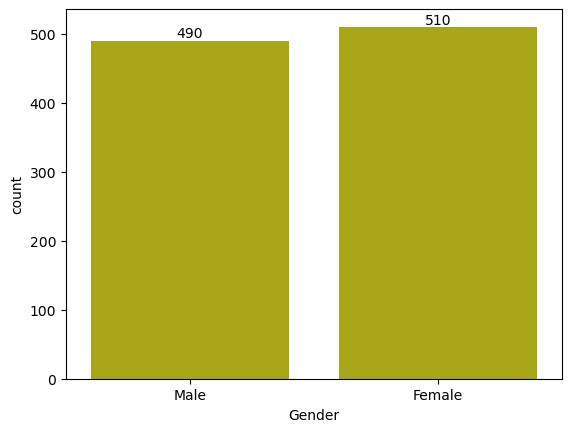

In [23]:
ax=sns.countplot(x='Gender',data=data,color='y')

for bar in ax.containers:
    ax.bar_label(bar)

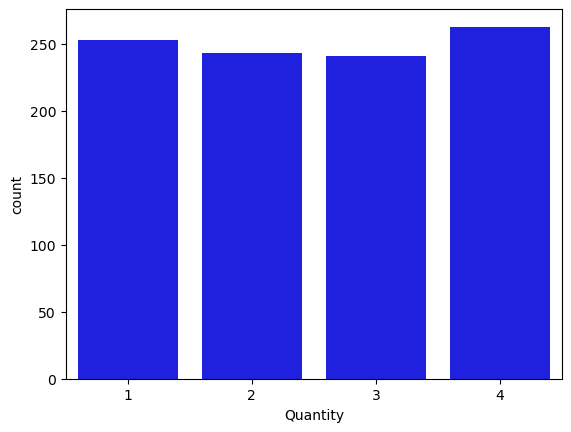

In [24]:
ax=sns.countplot(x='Quantity',data=data,color='b')

In [25]:
data1=data.groupby(['Product Category'],as_index=False)['Quantity'].sum().sort_values(by='Product Category',ascending=True)

In [26]:
data1

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


Time Series Analysis

*Assuming the Dataset has a 'Date' column,convert into datetime format*

In [54]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, quarter, and month from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Month'] = data['Date'].dt.month

Group by year,Quarter,Month and calculate the total amount of transactions

In [57]:
total_amount_by_year = data.groupby('Year')['Total Amount'].sum()
total_amount_by_quarter = data.groupby(['Year', 'Quarter'])['Total Amount'].sum()
total_amount_by_month = data.groupby(['Year', 'Month'])['Total Amount'].sum()


Print the total amount of transactions changed over years,Quarters,Months

In [60]:
print("\nTotal Amount of Transactions Changed Over Years:")
print(total_amount_by_year)

print("\nTotal Amount of Transactions Changed Over Quarters:")
print(total_amount_by_quarter)

print("\nTotal Amount of Transactions Changed Over Months:")
print(total_amount_by_month)


Total Amount of Transactions Changed Over Years:
Year
2023    454470
2024      1530
Name: Total Amount, dtype: int64

Total Amount of Transactions Changed Over Quarters:
Year  Quarter
2023  1          108500
      2          123735
      3           96045
      4          126190
2024  1            1530
Name: Total Amount, dtype: int64

Total Amount of Transactions Changed Over Months:
Year  Month
2023  1        35450
      2        44060
      3        28990
      4        33870
      5        53150
      6        36715
      7        35465
      8        36960
      9        23620
      10       46580
      11       34920
      12       44690
2024  1         1530
Name: Total Amount, dtype: int64


Plot Bar Graphs for Total Amount of Transactions changed over years,quarters and months

In [63]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Bar graph for total amount of transactions changed over years

Text(0, 0.5, 'Total Amount')

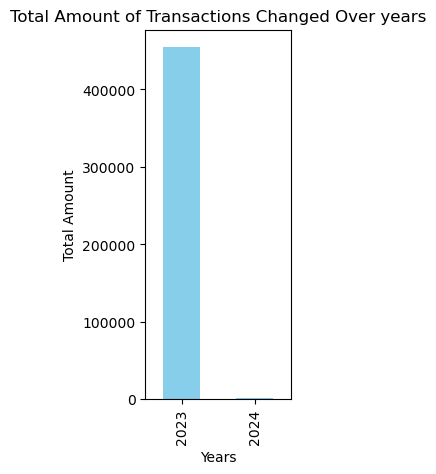

In [66]:
plt.subplot(1, 3, 1)
total_amount_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Amount of Transactions Changed Over years')
plt.xlabel('Years')
plt.ylabel('Total Amount')

Bar Graph of total Amount of Transactions changed over Quarters

Text(0, 0.5, 'Total Amount')

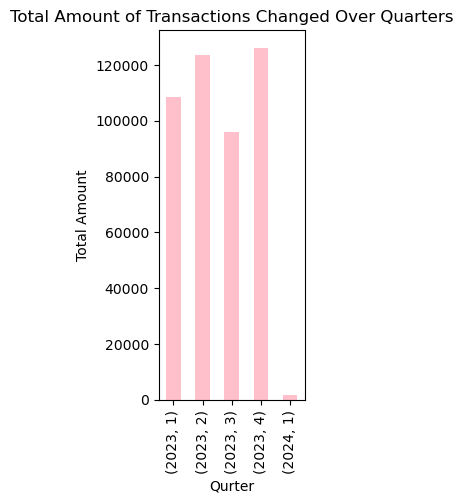

In [71]:
plt.subplot(1, 3, 1)
total_amount_by_quarter.plot(kind='bar', color='pink')
plt.title('Total Amount of Transactions Changed Over Quarters')
plt.xlabel('Qurter')
plt.ylabel('Total Amount')

Bar Graph of total Amount of Transactions changed over Months

Text(0, 0.5, 'Total Amount')

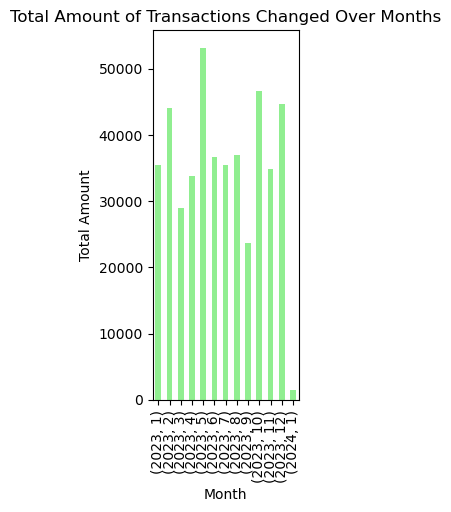

In [76]:
plt.subplot(1, 3, 3)
total_amount_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Amount of Transactions Changed Over Months')
plt.xlabel('Month')
plt.ylabel('Total Amount')

In [78]:
data.index

RangeIndex(start=0, stop=1000, step=1)

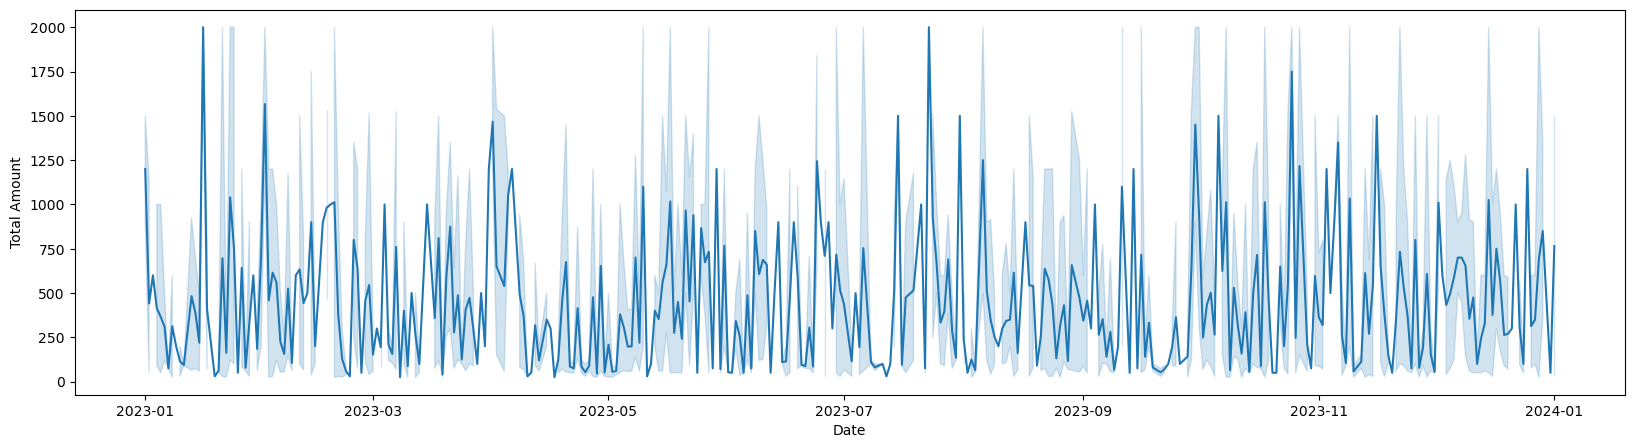

In [82]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Total Amount',data=data)
plt.show()

In [85]:
price_stats = data['Price per Unit'].describe()
print("\nDescriptive Statistics of Price per Unit:")
print(price_stats)


Descriptive Statistics of Price per Unit:
count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64


Plot a histogram of the price per unit to visualize its distribution

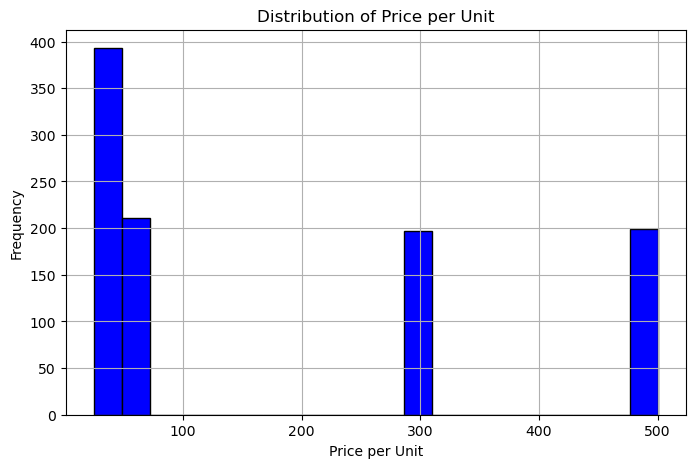

In [90]:
plt.figure(figsize=(8,5))
plt.hist(data['Price per Unit'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [92]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Quarter,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,4,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,1,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,2,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,2,5
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,4,11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,4,10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,4,12


Calculate the total revenue generated from sales

In [95]:
data['Total Amount'] = data['Quantity'] * data['Price per Unit']
total_amount = data['Total Amount'].sum()
print("\nTotal Revenue Generated: $", total_amount)


Total Revenue Generated: $ 456000


Calculate the average price per unit over time

In [98]:
avg_price_over_time = data.groupby('Date')['Price per Unit'].mean()

Print the average price per unit over time

In [101]:
print("\nAverage Price per Unit Over Time:")
print(avg_price_over_time)


Average Price per Unit Over Time:
Date
2023-01-01    366.666667
2023-01-02    151.250000
2023-01-03    300.000000
2023-01-04    193.333333
2023-01-05    191.666667
                 ...    
2023-12-27    175.000000
2023-12-28    183.333333
2023-12-29    281.250000
2023-12-31     25.000000
2024-01-01    265.000000
Name: Price per Unit, Length: 345, dtype: float64


Compute correlation matrix for numerical columns 

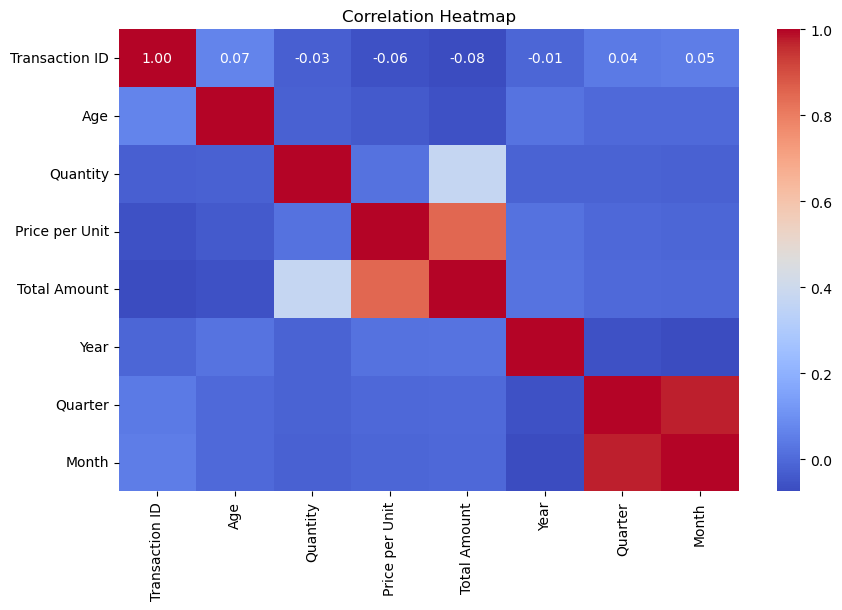

In [105]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

#plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
